## Midterm - Numerical Project

In [20]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [21]:
np.random.seed(0)

In [22]:
time_index = np.arange(0.01, 1.01, 0.01)

In [44]:
# standard brownian motion covariance matrix 
bm_cov = np.reshape(np.array([i if i < j else j for j in time_index for i in time_index]), (100,100))

In [49]:
# the standard brownian motion to be implemented 
brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, scale=1, size=100)) for _ in range(10)]), 
                            obj=0, 
                            values=0,
                            axis=1)

We consider the following processes 
##### $$X_t = e^{\ t \ / \ 2}cos \ B_t$$
##### $$Y_t = 1 - \int_{0}^{t} e^{\ s \ / \ 2}cos \ B_s \ dB_s$$

1. Plot 10 paths of the process $X_t$ on $[0, 1]$ with discretization of $1/100$
2. Plot 10 paths of the process $Y_t$ on $[0, 1]$ with discretization of $1/100$ (same brownian path)

In [104]:
X_t = np.array([math.exp(i/2) for i in np.insert(time_index,0,0)]) * np.cos(brownian_motion)

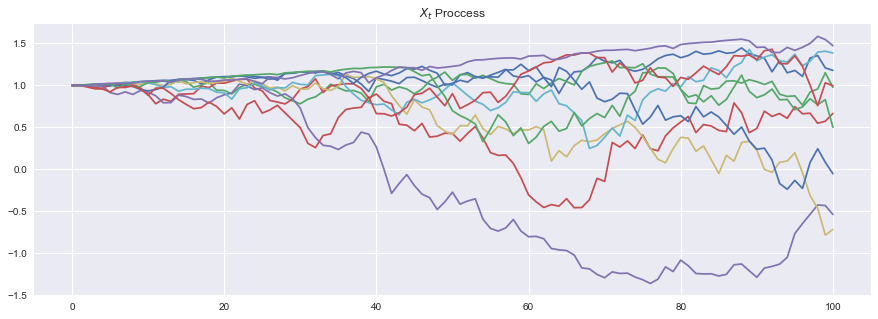

In [108]:
plt.figure(figsize=(15,5))
plt.title("$X_t$ Proccess")
for  i in X_t:
    plt.plot(i)

In [ ]:
Y_t = 1

In [ ]:
plt.figure(figsize=(15,5))
plt.title("$Y_t$ Proccess")
for  i in Y_t:
    plt.plot(i)

Plot the paths of the two processes on the same graph.

In [ ]:
Estimate the error between the two processes given by E[jX1􀀀Y1j] by doing the empirical average of jX1 􀀀 Y1j on 10 paths, 100 paths and 1000 paths.